In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("iphone_purchase_records.csv")
df.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [3]:
df.shape

(400, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [5]:
df.isnull().sum()

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

In [6]:
df.describe()

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


<AxesSubplot:xlabel='Purchase Iphone', ylabel='count'>

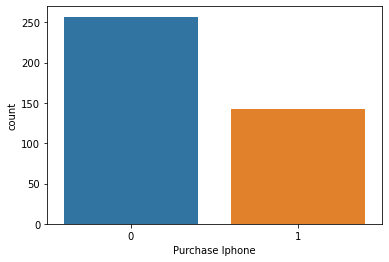

In [7]:
sns.countplot(data=df, x = "Purchase Iphone" )

<AxesSubplot:xlabel='Gender', ylabel='count'>

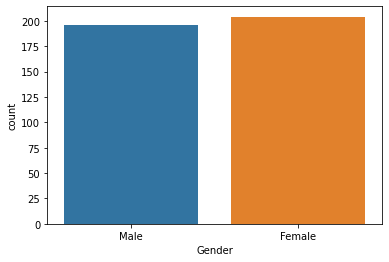

In [8]:
sns.countplot(data=df, x="Gender")

<AxesSubplot:>

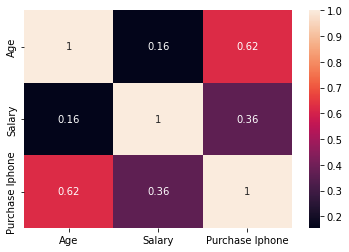

In [9]:
sns.heatmap(df.corr(), annot=True)

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [11]:
df["Gender"] = le.fit_transform(df["Gender"])

In [12]:
x = df.drop("Purchase Iphone", axis=1)
y = df["Purchase Iphone"]

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [28]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [29]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = "entropy", random_state=0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [30]:
y_pred = classifier.predict(x_test)

In [31]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred) 

print(cm)

[[74  5]
 [ 6 35]]


In [32]:
model.score(x_test,y_test)

0.875

In [33]:
accuracy = metrics.accuracy_score(y_test, y_pred) 

print("Accuracy score:",accuracy)

Accuracy score: 0.9083333333333333
